In [32]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")

df = dataset['train'].to_pandas()


# Data Cleanup
df['job_posted_date']= pd.to_datetime(df["job_posted_date"])


df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [33]:
df_DA_US = df[(df['job_title']== 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [34]:
df_DA_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

df_DA_US_explode = df_DA_US.explode('job_skills')

df_DA_US_explode[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
92,120000.0,sql
92,120000.0,python
100,228222.0,sql
100,228222.0,r
100,228222.0,python


In [35]:
df_DA_skills = df_DA_US_explode.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)


df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count', 'median':'median_salary'})

In [36]:
DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count']/ DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand


,skill_count,median_salary,skill_percent
job_skills,,,
sql,9574,120000.0,60.725612
python,9195,128000.0,58.321705
r,4127,122165.5,26.176583
tableau,3751,114000.0,23.791704
aws,3294,136400.0,20.893061
excel,3049,92500.0,19.339084
sas,2634,110000.0,16.706837
spark,2570,142500.0,16.300901
azure,2280,128025.0,14.461499


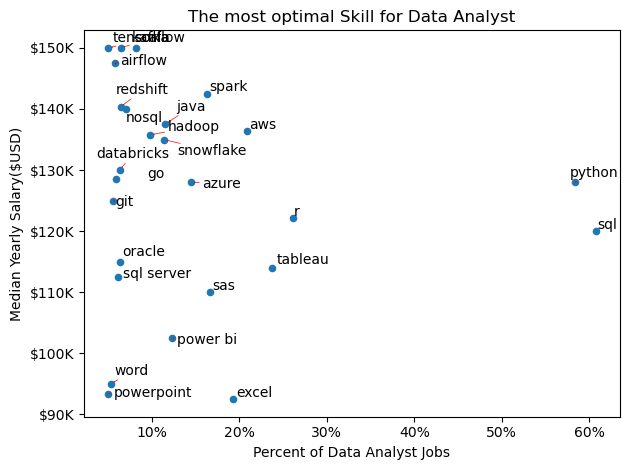

In [37]:
#fig, ax = plt.subplots()
from adjustText import adjust_text

df_DA_skills_high_demand .plot(kind='scatter', x='skill_percent', y='median_salary')


texts = []
for i , txt in enumerate(df_DA_skills_high_demand .index):
    texts.append(plt.text(df_DA_skills_high_demand ['skill_percent'].iloc[i], df_DA_skills_high_demand ['median_salary'].iloc[i], txt))


adjust_text(texts , arrowprops=dict(arrowstyle="->", color='r', lw=0.5))


from matplotlib.ticker import PercentFormatter
ax = plt.gca()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int (y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))


plt.title('The most optimal Skill for Data Analyst')
plt.ylabel('Median Yearly Salary($USD)')
plt.xlabel('Percent of Data Analyst Jobs')
plt.tight_layout()
plt.show()

In [38]:
df_technology = df['job_type_skills'].copy()


#remove duplicates

df_technology = df_technology.drop_duplicates()

# remove NaN values

df_technology = df_technology.dropna()


# combine all dictionaries into one

technology_dict = {}

for row in df_technology:

    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value

        else:
            technology_dict[key] = value

for key,value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['msaccess',
  'esquisse',
  'word',
  'sharepoint',
  'spreadsheet',
  'powerpoint',
  'looker',
  'datarobot',
  'powerbi',
  'excel',
  'splunk',
  'microstrategy',
  'outlook',
  'ssrs',
  'power bi',
  'visio',
  'alteryx',
  'sas',
  'ms access',
  'spss',
  'dax',
  'sheets',
  'tableau',
  'sap',
  'cognos',
  'ssis',
  'nuix',
  'qlik'],
 'programming': ['fortran',
  'typescript',
  'cobol',
  'objective-c',
  'delphi',
  'assembly',
  'clojure',
  'no-sql',
  'ruby',
  'scala',
  'perl',
  'visualbasic',
  'sass',
  'swift',
  'visual basic',
  't-sql',
  'c#',
  'erlang',
  'matlab',
  'go',
  'c',
  'lisp',
  'golang',
  'c++',
  'nosql',
  'java',
  'php',
  'bash',
  'apl',
  'mongo',
  'crystal',
  'shell',
  'sas',
  'javascript',
  'haskell',
  'r',
  'sql',
  'pascal',
  'python',
  'f#',
  'elixir',
  'css',
  'html',
  'groovy',
  'solidity',
  'rust',
  'dart',
  'powershell',
  'ocaml',
  'vba',
  'julia',
  'vb.net',
  'kotlin',
  'mongodb',
  '

In [39]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])


df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,msaccess
0,analyst_tools,esquisse
0,analyst_tools,word
0,analyst_tools,sharepoint
0,analyst_tools,spreadsheet
...,...,...
9,sync,zoom
9,sync,twilio
9,sync,slack
9,sync,wire


In [40]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

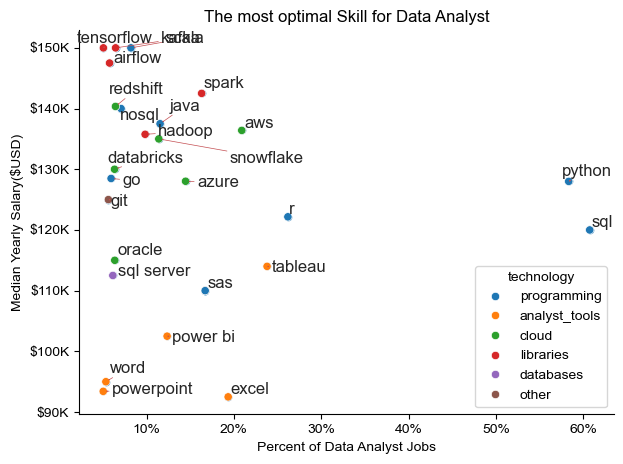

In [43]:
from adjustText import adjust_text

df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')

sns.scatterplot(data=df_plot, x='skill_percent', y='median_salary', hue= 'technology' )

sns.despine()
sns.set_theme(style='ticks')

texts = []
for i , txt in enumerate(df_DA_skills_high_demand .index):
    texts.append(plt.text(df_DA_skills_high_demand ['skill_percent'].iloc[i], df_DA_skills_high_demand ['median_salary'].iloc[i], txt))


adjust_text(texts , arrowprops=dict(arrowstyle="->", color='r', lw=0.5))


from matplotlib.ticker import PercentFormatter
ax = plt.gca()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int (y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))


plt.title('The most optimal Skill for Data Analyst')
plt.ylabel('Median Yearly Salary($USD)')
plt.xlabel('Percent of Data Analyst Jobs')
plt.tight_layout()
plt.show()